# [Introduction to the Modeling and Analysis of Complex Systems](https://textbooks.opensuny.org/introduction-to-the-modeling-and-analysis-of-complex-systems/)

**Hiroki Sayama**

___

**Complex systems can be informally defined as networks of many
interacting components that may arise and evolve through self-organization.**

Complex systems are networks made of a number of components that interact with
each other, typically in a nonlinear fashion. Complex systems may arise and evolve
through self-organization, such that they are neither completely regular nor completely
random, permitting the development of emergent behavior at macroscopic
scales.

____

#### IMPORTS

In [1]:
# !pip install pyCx

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

____

## PRELIMINARIES

Warren Weaver (!= Norbert Wiener) - not complex is a collection of independent components - “problems of disorganized complexity” (Conventional statistics works perfectly when handling such independent entities)

!=

“problems of organized complexity”:
- emergence
- self-organization

![fields](imgs/fields.jpg)

**A model is a simplified representation of a system. It can be conceptual, verbal,
diagrammatic, physical, or formal (mathematical).** (A good model is simple, valid, and robust.)

Modeling complex systems -> computer simulations

- cellular automate - John von Neumann and Stanisław Ulam
- Dynamical networks - artificial neural network research by Warren Mc-Culloch andWalter Pitts
- agent-based modeling (ABM)

____

## DYNAMICAL SYSTEMS

**A dynamical system is a system whose state is uniquely specified by a set of variables
and whose behavior is described by predefined rules.** (Discrete-time, Continuous-time)

A **phase space** of a dynamical system is a theoretical space where every state of the
system is mapped to a unique spatial location.   
**Atractor** + **basin of attraction** - If you see that trajectories are converging to a certain point or area in
the phase space, that means the system’s state is stable in that area.

____

### Discrete-Time Models I

**Linear system** -  A dynamical equation whose rules involve just a linear combination
of state variables (a constant times a variable, a constant, or their sum).  
**Nonlinear system** - Anything else (e.g., equation involving squares, cubes, radicals,
trigonometric functions, etc., of state variables).  
**First-order system** - A difference equation whose rules involve state variables of the
immediate past (at time t 􀀀 1) onlya.  
**Autonomous system** - A dynamical equation whose rules don’t explicitly include time
t or any other external variables.  

Non-autonomous, higher-order difference equations can always be converted into
autonomous, first-order forms, by introducing additional state variables. Autonomous first-order equation = **iterative maps**  

Linear equations are always analytically solvable, while nonlinear equations don’t
have analytical solutions in general.

**Computer simulation:**
- Initialize
- Observe
- Update

In [13]:
def initialize():
    global x, result
    x = 1.
    result = [x]
    
def observe():
    global x, result
    result.append(x)
    
def update():
    global x, result
    x = a * x
    
a = 1.1
initialize()
for r in range(30):
    update()
    observe()

In [36]:
### Alternative
def fc(x, a): return a * x
results = []
a = 1.2
x = 1

for idx in range(30):
    x = fc(x, a)
    results.append(x)

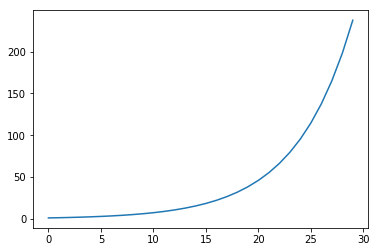

In [37]:
plt.plot(results)

OSCILATION

In [40]:
def update(x, y):
    x = 0.5 * x + y
    y = -0.5 * x + y
    return (x, y)

In [42]:
li_y = []
li_x = []
x, y = 1, 1
for _ in range(30):
    x, y = update(x, y)
    li_x.append(x)
    li_y.append(y)

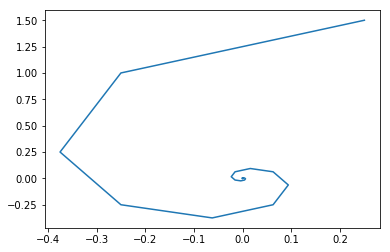

In [45]:
plt.plot(li_y, li_x)

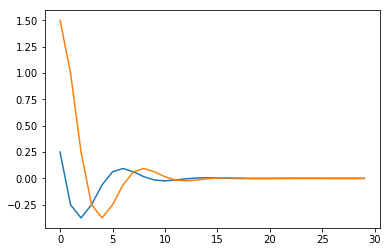

In [47]:
plt.plot(li_y)
plt.plot(li_x)
plt.show()

In [49]:
def oscilator(x, y):
    nextx = 0.5 * x + y
    nexty = -0.5 * x + y
    return (nextx, nexty)

In [69]:
li_y = []
li_x = []
x, y = 1, 1
for _ in range(18):
    x, y = oscilator(x, y)
    li_x.append(x)
    li_y.append(y)

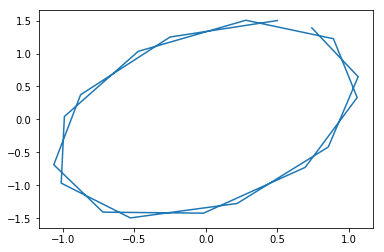

In [70]:
plt.plot(li_y, li_x)

The issue of how to implement simultaneous updating of multiple variables is a common
technical theme that appears in many complex systems simulation models.

*EXERCISE*

In [96]:
def update(x, y):
    nextx = x + y
    nexty = x
    return(nextx, nexty)

In [97]:
x = 1
y = 1
fibs = []
for _ in range(20):
    x, y = update(x, y)
    fibs.append(x)

Linear dynamical systems can show only exponential growth/decay, periodic oscillation,
stationary states (no change), or their hybrids (e.g., exponentially growing oscillation)

#### Predator~Pray

In [320]:
def update_prey(prey, pred, r, K, b):
    nprey = prey + r * prey * (1-prey/K) - (1 - 1/(b*pred+1)) * prey
    return nprey

def update_pred(prey, pred, d, c):
    npred = pred - d * pred + (c * prey) * pred
    return npred

In [428]:
prey = 1 # prey population (x)
pred = 1 # predators population (y)
r = 1 # prey growth rate
d = 0.8 # pred death rate
c = 1
b = 0.8
K = 5

In [429]:
pred_log = []
prey_log = []
for _ in range(1000):
    prey = update_prey(prey, pred, r, K, b)
    pred = update_pred(prey, pred, d, c)
    pred_log.append(pred)
    prey_log.append(prey)

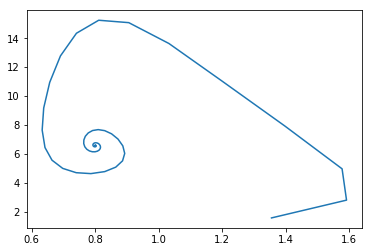

In [430]:
plt.plot(prey_log, pred_log)

____

### Discrete-Time Models II

- finding equilibrium points (~steady states, where sstem can stay unchanged over time)
- ploting phase space in X dims
- cobweb plots
- graph representations of phase spaces

*asymptotic behavior*

In [29]:
from pylab import *
a = 1.1

def initialize():
    global x, result
    x = 1.
    result = [x]
    
def observe():
    global x, result
    result.append(x)
    
def f(x):
    return a * x

def update():
    global x, result
    x = f(x)

In [30]:
initialize()
for t in range(30):
    update()
    observe()

In [31]:
ress = list(map(f, rng))

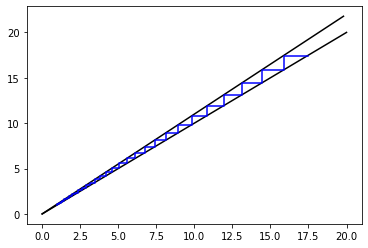

In [32]:
xmin, xmax = 0, 20
plot([xmin, xmax], [xmin, xmax], 'k')
rng = arange(xmin, xmax, (xmax - xmin) / 100.)
plot(rng, list(map(f, rng)), 'k')
horizontal = [result[0]]
vertical = [result[0]]
for x in result[1:]:
    horizontal.append(vertical[-1])
    vertical.append(x)
    horizontal.append(x)
    vertical.append(x)
plot(horizontal, vertical, 'b')
show()

In [36]:
import networkx as nx
from pylab import *

In [37]:
g = nx.DiGraph()
for x in range(6):
    for y in range(6):
        g.add_edge((x, y), ((x * y) % 6, x))

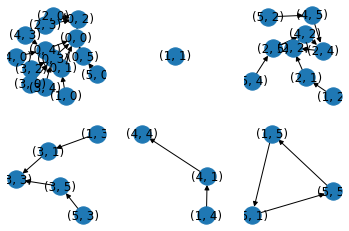

In [39]:
ccs = [cc for cc in nx.connected_components(g.to_undirected())]
n = len(ccs)
w = ceil(sqrt(n))
h = ceil(n / w)
for i in range(n):
    subplot(h, w, i + 1)
    nx.draw(nx.subgraph(g, ccs[i]), with_labels = True)
show()

Bifurcation is a qualitative, topological change of a system’s phase space that occurs
when some parameters are slightly varied across their critical thresholds.